<a href="https://colab.research.google.com/github/tolnaidominik/QRM4PB_AXJ0GV_GepiLatas/blob/main/QRM4PB_AXJ0GV_GepiLatas_Feleves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
images = glob.glob("/content/gdrive/MyDrive/GepiLatas/*.jpg")

In [ ]:
# Vészleállási paraméterek beállítása
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# 7x7 pattern
objp = np.zeros((7*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2)
objpoints = [] # 3D pontok (Való világ)
imgpoints = [] # 2D pontok (Kép)

In [ ]:
GRIDSIZE = 32  # 32 mm egy négyzet szélessége

objp[:, :2] = np.mgrid[0:7*GRIDSIZE:GRIDSIZE,0:7*GRIDSIZE:GRIDSIZE].T.reshape(-1,2)
print(objp)

[[  0.   0.   0.]
 [ 32.   0.   0.]
 [ 64.   0.   0.]
 [ 96.   0.   0.]
 [128.   0.   0.]
 [160.   0.   0.]
 [192.   0.   0.]
 [  0.  32.   0.]
 [ 32.  32.   0.]
 [ 64.  32.   0.]
 [ 96.  32.   0.]
 [128.  32.   0.]
 [160.  32.   0.]
 [192.  32.   0.]
 [  0.  64.   0.]
 [ 32.  64.   0.]
 [ 64.  64.   0.]
 [ 96.  64.   0.]
 [128.  64.   0.]
 [160.  64.   0.]
 [192.  64.   0.]
 [  0.  96.   0.]
 [ 32.  96.   0.]
 [ 64.  96.   0.]
 [ 96.  96.   0.]
 [128.  96.   0.]
 [160.  96.   0.]
 [192.  96.   0.]
 [  0. 128.   0.]
 [ 32. 128.   0.]
 [ 64. 128.   0.]
 [ 96. 128.   0.]
 [128. 128.   0.]
 [160. 128.   0.]
 [192. 128.   0.]
 [  0. 160.   0.]
 [ 32. 160.   0.]
 [ 64. 160.   0.]
 [ 96. 160.   0.]
 [128. 160.   0.]
 [160. 160.   0.]
 [192. 160.   0.]
 [  0. 192.   0.]
 [ 32. 192.   0.]
 [ 64. 192.   0.]
 [ 96. 192.   0.]
 [128. 192.   0.]
 [160. 192.   0.]
 [192. 192.   0.]]


/content/gdrive/MyDrive/GepiLatas/348359029_1307399276652564_6732190370366513568_n.jpg


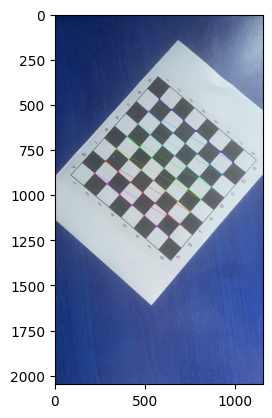

/content/gdrive/MyDrive/GepiLatas/348356984_632265358946994_4412006160510223442_n.jpg


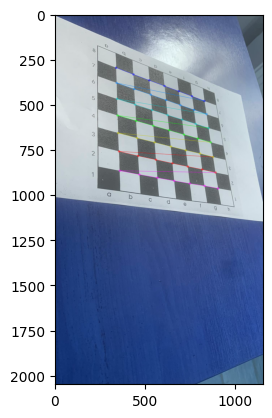

/content/gdrive/MyDrive/GepiLatas/348356764_1418556975351210_4275107152208017664_n.jpg


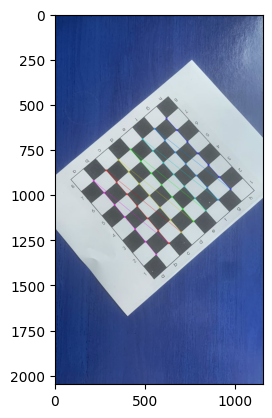

/content/gdrive/MyDrive/GepiLatas/348369100_796234195056179_479975871018581422_n.jpg


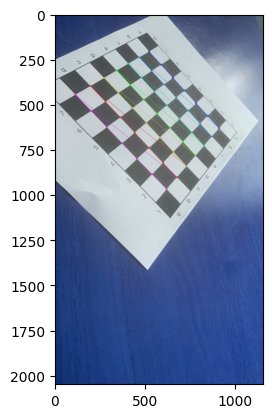

/content/gdrive/MyDrive/GepiLatas/348356502_216837861164034_9051608867528200340_n.jpg


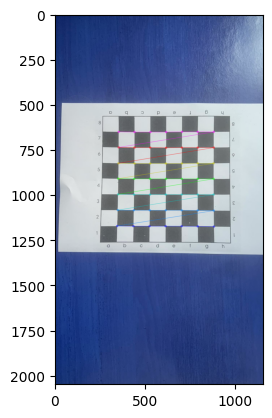

/content/gdrive/MyDrive/GepiLatas/348375129_1211191599584372_4345767318840121442_n.jpg


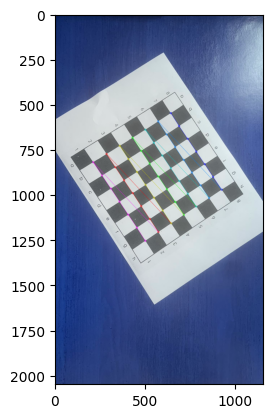

/content/gdrive/MyDrive/GepiLatas/Gepi2.jpg


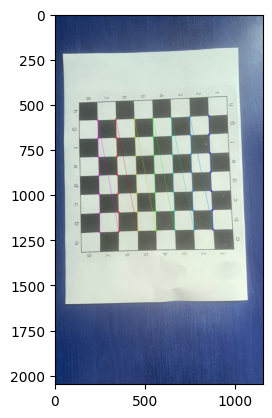

/content/gdrive/MyDrive/GepiLatas/Gepi1.jpg


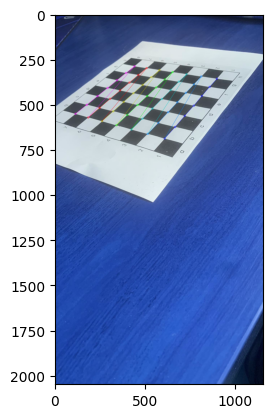

/content/gdrive/MyDrive/GepiLatas/348368220_934275514449655_6869114496451652258_n.jpg


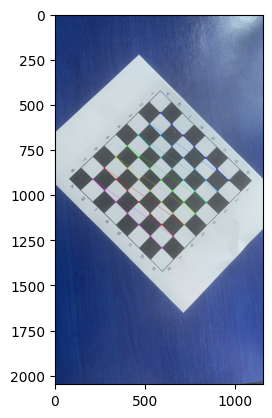

/content/gdrive/MyDrive/GepiLatas/348366358_1906978053005574_7473085723070794610_n.jpg


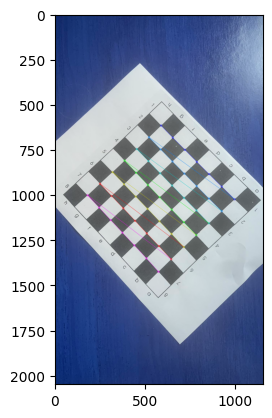

/content/gdrive/MyDrive/GepiLatas/348362135_736258601588262_4098550987302434383_n.jpg


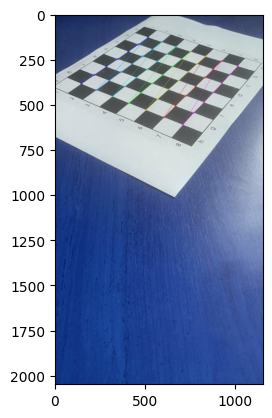

/content/gdrive/MyDrive/GepiLatas/348362371_217126427779102_1399067332355661425_n.jpg


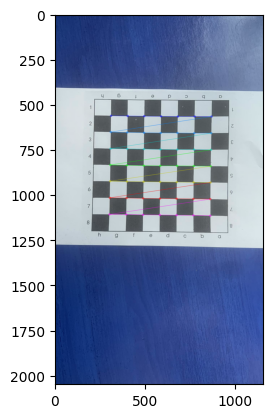

/content/gdrive/MyDrive/GepiLatas/348360516_638044261508690_360171849646085199_n.jpg


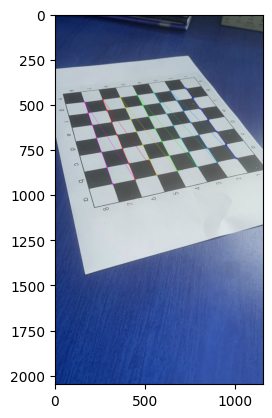

/content/gdrive/MyDrive/GepiLatas/348362135_736258601588262_4098550987302434383_n (1).jpg


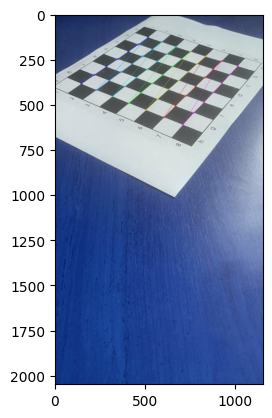

/content/gdrive/MyDrive/GepiLatas/348360473_820492989501063_4542249876627246364_n.jpg


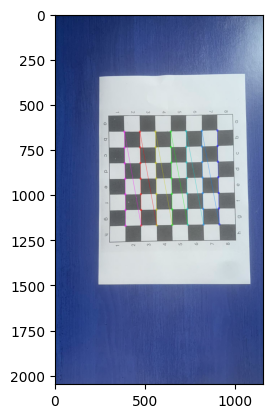

/content/gdrive/MyDrive/GepiLatas/348360834_215076254629893_2659641084309817626_n.jpg


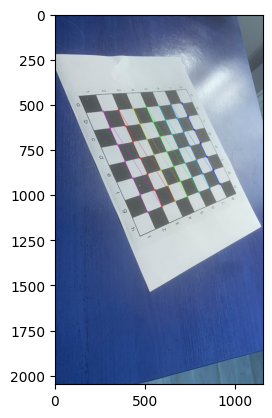

/content/gdrive/MyDrive/GepiLatas/348361826_1011716129833118_5346765322270694415_n.jpg


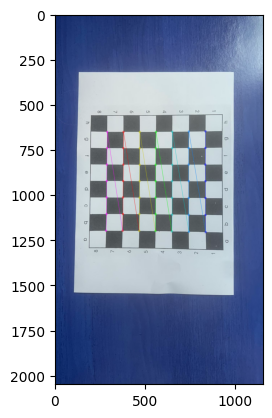

/content/gdrive/MyDrive/GepiLatas/348366358_1906978053005574_7473085723070794610_n (1).jpg


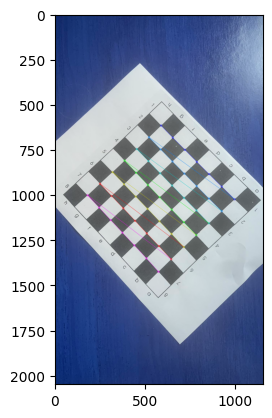

/content/gdrive/MyDrive/GepiLatas/348360236_931551441510881_4421224180567131035_n.jpg


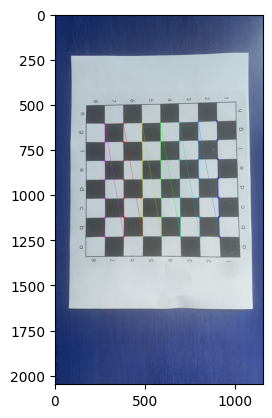

/content/gdrive/MyDrive/GepiLatas/348359405_255871620324175_217933319017544029_n.jpg


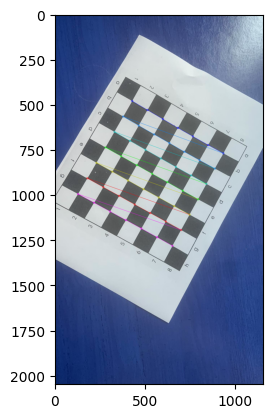

/content/gdrive/MyDrive/GepiLatas/348359405_255871620324175_217933319017544029_n (1).jpg


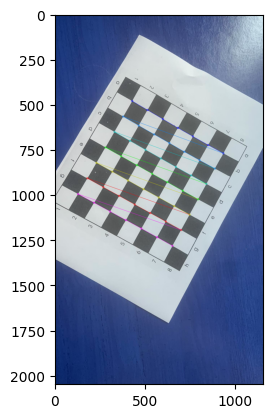

/content/gdrive/MyDrive/GepiLatas/348359140_1469585493855974_4748396392200934006_n.jpg


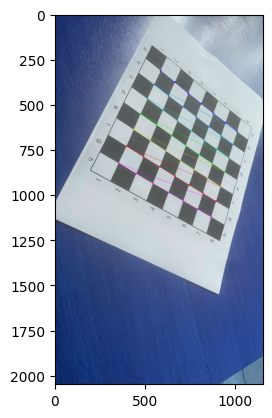

/content/gdrive/MyDrive/GepiLatas/348359140_1469585493855974_4748396392200934006_n (1).jpg


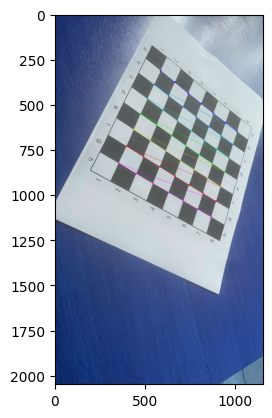

In [ ]:
#A kamera kalibrációjához szükséges fontos bemeneti adatok a valós világ 3D pontok halmaza és ezeknek a pontoknak a képen való megfelelő 2D koordinátái.
#A kép kiszinezésénél az összeérő fekete sarkokat használja segítségül a program.

for fname in images:
    img = cv.imread(fname)
    print(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, corners = cv.findChessboardCorners(gray, (7,7), None)
    #Ha megtaláltuk a sakktábla sarkát hozzáadjuk a mátrixokhoz. (Pontosítás után)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Sarkok kirajzolása
        cv.drawChessboardCorners(img, (7,7), corners2, ret)
        plt.imshow(img)
        plt.show()

In [ ]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None) 

#A beépített OpenCV kamera kalibrációt felhasználva kiszámoljuk a felsorolt paramétereket

In [ ]:
img = cv.imread("/content/gdrive/MyDrive/GepiLatas/348362135_736258601588262_4098550987302434383_n.jpg")
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

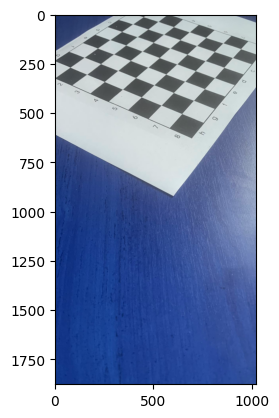

In [ ]:
# undistort -> Az eredeti képet "torzítlanítjuk", mely szerint a feljavított belső paramétereket felhasználva képzünk egy új képet.
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# ROI számolás a kép vágásával
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
plt.imshow(dst)
plt.show()

In [ ]:
print(dst.shape)

(1877, 1021, 3)


In [ ]:
print("A kép első sarkának 3D koordinátái: ", np.asarray(objpoints)[0,0,:])

A kép első sarkának 3D koordinátái:  [0. 0. 0.]


A kép első sarkának 2D koordinátái:  [577.7911  471.39114]


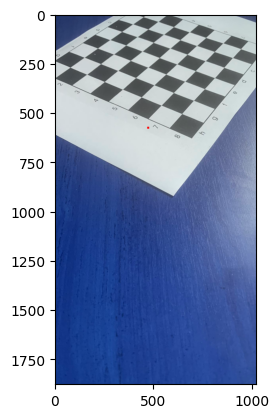

In [ ]:
imgpointsnp = np.asarray(imgpoints).reshape(-1,49,2)
print("A kép első sarkának 2D koordinátái: ", imgpointsnp[0,0,:])

dst[572:582, 466:476] = (255,0,0)
plt.imshow(dst)
plt.show()

In [ ]:
print("Kép felbontása: ", gray.shape)

Kép felbontása:  (2048, 1152)


In [ ]:
print("X fókusztávolság: ", mtx[0,0])

X fókusztávolság:  1499.7831008795417


In [ ]:
print("Y fókusztávolság: ", mtx[1,1])

Y fókusztávolság:  1501.8625604484891


In [ ]:
print("X középpont:", mtx[0,2])

X középpont: 589.2783614534168


In [ ]:
print("Y középpont:", mtx[1,2])

Y középpont: 1028.8163011730119


In [ ]:
print("Dőlésszög: ", mtx[0,1])

#Fontos a kamera kalibrációban, mert segít helyesen beállítani a képtengelyeket, és biztosítja a képek geometriai pontosságát és valósághűségét.

Dőlésszög:  0.0


In [ ]:
tvecsnp = np.asarray(tvecs).reshape(-1,3)

In [ ]:
print("A kép tranzlációs vektora: ", tvecsnp[0,:])

#A kamera koordinátarendszerének eltolását jelöli a világkoordinátarendszerhez képest. Ez a vektor megadja a kamera pozícióját a térben.

A kép tranzlációs vektora:  [  -5.48017669 -198.15581045  545.95460477]


In [ ]:
rvecsnp = np.asarray(rvecs).reshape(-1,3)

In [ ]:
print("A kép rotációs vektora: ", rvecsnp[0,:])

#A kamera koordinátarendszerének elforgatását fejezi ki a világkoordinátarendszerhez képest. Ez a vektor leírja a kamera helyzetét a térben.

A kép rotációs vektora:  [-0.04985864  0.01598788  0.70952834]


In [ ]:
print("A kamera belső paraméterei (K matrix):", mtx)

#A kamera belső paraméterei -> fókusztávolság (f_x, f_y), optikai középpont (c_x, c_y), torzítási paraméterek

A kamera belső paraméterei (K matrix): [[1.49978310e+03 0.00000000e+00 5.89278361e+02]
 [0.00000000e+00 1.50186256e+03 1.02881630e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [ ]:
print("Torzítási együttható(k): ", dist)

#Képen megjelenő objektumok nem jelennek meg a valóságos formájukban és méretükben

Torzítási együttható(k):  [[ 3.37106198e-01 -1.76995861e+00  5.40911449e-04  6.14942768e-03
   3.07330807e+00]]


In [ ]:
print("Re-projection error: ", ret)

#Egy olyan becslés, amely visszaadja azt, hogy a paraméterek mennyire pontosak.

Re-projection error:  1.375372211719395


In [ ]:
print("Új paraméter értékek:")
print(newcameramtx) #Az mtx paraméterei alapján számol új paraméter értékeket.
print("Eltolásvektor:")
print(ret) # Eltolásvektor -> Ez a vektorok halmaza, amelyek leírják a kalibrációs minta vagy pontok helyzetét a világkoordinátarendszerben
print("Belső paraméterek:")
print(mtx) #A kamera belső paraméterei -> fókusztávolság (f_x, f_y), optikai középpont (c_x, c_y), torzítási paraméterek
print("Torzítási együttható:")
print(dist) #Torzítási együttható -> képen megjelenő objektumok nem jelennek meg a valóságos formájukban és méretükben
print("Fordítási vektor:")
print(tvecs) #Fordítási vektor -> az optikai tengely és a kamera koordinátarendszer közötti elmozdulást jelöli

Új paraméter értékek:
[[1.52841565e+03 0.00000000e+00 5.92883673e+02]
 [0.00000000e+00 1.58537427e+03 1.02768766e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Eltolásvektor:
1.375372211719395
Belső paraméterek:
[[1.49978310e+03 0.00000000e+00 5.89278361e+02]
 [0.00000000e+00 1.50186256e+03 1.02881630e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Torzítási együttható:
[[ 3.37106198e-01 -1.76995861e+00  5.40911449e-04  6.14942768e-03
   3.07330807e+00]]
Fordítási vektor:
(array([[  -5.48017669],
       [-198.15581045],
       [ 545.95460477]]), array([[ -76.80058893],
       [-222.04025146],
       [ 464.72664594]]), array([[   9.53818972],
       [-164.50517592],
       [ 557.80664502]]), array([[ -23.53429409],
       [-273.4731172 ],
       [ 509.43186156]]), array([[104.27468317],
       [ 53.28069208],
       [543.49248477]]), array([[  19.63386836],
       [-181.76792635],
       [ 580.05365974]]), array([[  81.07969777],
       [-143.32539542],
       [ 472.1715163